In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
items = pd.read_csv('../input/amazon-cell-phones-reviews/20191226-items.csv')
reviews = pd.read_csv('../input/amazon-cell-phones-reviews/20191226-reviews.csv')

In [3]:
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [4]:
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [5]:
reviews = pd.merge(reviews, items, how='left', left_on ='asin', right_on ='asin')

In [6]:
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)


In [7]:
reviews.dropna(inplace=True)
reviews.isnull().sum()
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
43,B001AO4OUC,Elizabeth,4,"May 12, 2009",True,tough little phone,This phone isn't kidding when it says military...,1.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0
44,B001AO4OUC,"Ron Malinowski, Jr.",1,"November 19, 2012",True,Boost Mobile no Longer allows IDEN service,I bought this phone and found out IDEN phones ...,2.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0
49,B001AO4OUC,PENNY,4,"November 25, 2012",True,SIM CARD,PHONE DID NOT COME WITH A SIM CARD....INFORMAT...,1.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0
53,B001AO4OUC,Anthony L. Savarese,1,"October 18, 2009",True,Cell,Wouldn't know anything about the cell phone I ...,1.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0
54,B001AO4OUC,Yoda,4,"April 7, 2010",False,For a basic phone quite good,For someone needing a very basic phone and ser...,2.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27071 entries, 43 to 67982
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            27071 non-null  object 
 1   name            27071 non-null  object 
 2   rating          27071 non-null  int64  
 3   date            27071 non-null  object 
 4   verified        27071 non-null  bool   
 5   title           27071 non-null  object 
 6   body            27071 non-null  object 
 7   helpfulVotes    27071 non-null  float64
 8   brand           27071 non-null  object 
 9   item_title      27071 non-null  object 
 10  url             27071 non-null  object 
 11  image           27071 non-null  object 
 12  overall_rating  27071 non-null  float64
 13  reviewUrl       27071 non-null  object 
 14  totalReviews    27071 non-null  int64  
 15  price           27071 non-null  float64
 16  originalPrice   27071 non-null  float64
dtypes: bool(1), float64(4), int64(

In [9]:
from datetime import datetime

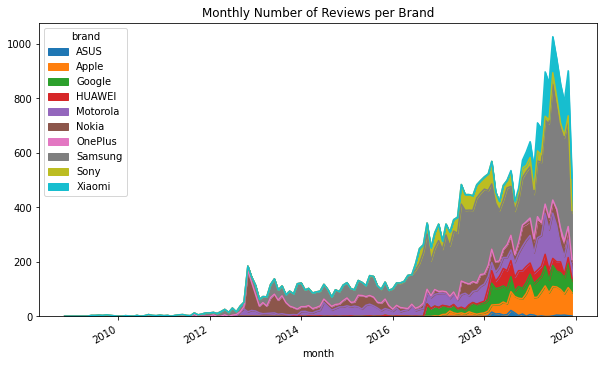

In [10]:
reviews['date'] = reviews['date'].apply(lambda x : datetime.strptime(x, '%B %d, %Y'))
reviews["month"] = reviews["date"].apply(lambda x: x.replace(day=1))
ax = pd.pivot_table(reviews, 
                    index="month", 
                    columns="brand", 
                    values="asin", 
                    aggfunc="count", 
                    fill_value=0).plot.area(title="Monthly Number of Reviews per Brand", figsize=(10, 6))

In [11]:
### Vader Analysis
reviews['positivity'] = reviews['rating'].apply(lambda x : 1 if x > 3 else -1)

import plotly.express as px
fig = px.scatter(reviews, x='date', y='positivity',color='brand')
fig.show()
group=reviews.groupby('brand')
asus=group.get_group('ASUS')
import plotly.express as px
fig = px.scatter(x=asus['date'], y=asus['positivity'])
fig.show()


In [12]:
plt.style.use('ggplot')

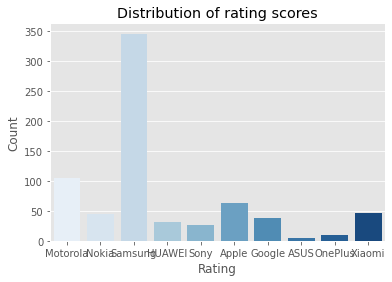

<AxesSubplot:ylabel='asin'>

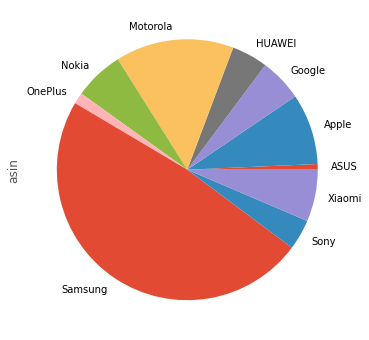

In [13]:
sns.countplot(items['brand'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
items.groupby('brand').count()['asin'].plot(kind='pie',figsize=(8,6))

In [14]:
items.groupby('brand').count()['asin'].sort_values(ascending=False)

brand
Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
Name: asin, dtype: int64

#### Average Rating per Brand

<AxesSubplot:ylabel='brand'>

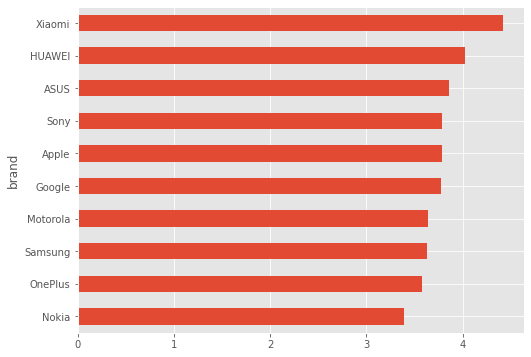

In [15]:
items.groupby('brand').mean()['rating'].sort_values().plot(kind='barh',figsize=(8,6))